In [2]:
# Import tensorflow
import tensorflow as tf

In [3]:
# Add timestamp
import datetime
datetime.datetime.now()

datetime.datetime(2023, 8, 20, 9, 15, 45, 557891)

Always check if you are using a GPU or not!!

GPU grants u more computational power and your file will run faster

In [4]:
!nvidia-smi

Sun Aug 20 09:15:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Tesla T4

We can always change the runtime type
Go to Runtime -> Change Runtime Type -> Hardware Accelerator and select "GPU".

#Downloading and becoming one with the data

In [5]:
import zipfile

#10% of data of 10_food_classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip


--2023-08-20 09:15:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.128.128, 142.251.6.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   298MB/s    in 0.5s    

2023-08-20 09:15:46 (298 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [6]:
#Unzipping the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

Importing helper_functions file to use all the functions we will reuire

In [7]:
!wget https://raw.githubusercontent.com/nikbhaladhare2104/TensorFlow-Extraa/TensorFlow/helper_functions.py

--2023-08-20 09:15:47--  https://raw.githubusercontent.com/nikbhaladhare2104/TensorFlow-Extraa/TensorFlow/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15781 (15K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  15.41K  --.-KB/s    in 0.001s  

2023-08-20 09:15:47 (18.9 MB/s) - ‘helper_functions.py’ saved [15781/15781]



In [8]:
from helper_functions import walk_through_dir

Walk_through_dir prints how many directories and images are there in a dir.

In [9]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/tra

## Creating data loaders (preparing the data)

To make our images of size (224, 224) and of values between 0 and 1

In [10]:
# Input Data setup
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_data_gen = ImageDataGenerator(rescale = 1/255.)
test_data_gen = ImageDataGenerator(rescale = 1/255.)

In [11]:
print("Train:")
train_data_10_percent = train_data_gen.flow_from_directory(train_dir,
                                                           target_size = IMAGE_SHAPE,
                                                           batch_size = BATCH_SIZE,
                                                           class_mode = "categorical")


Train:
Found 750 images belonging to 10 classes.


In [12]:
print("Test:")
test_data_10_percent = test_data_gen.flow_from_directory(test_dir,
                                                         target_size = IMAGE_SHAPE,
                                                         batch_size = BATCH_SIZE,
                                                         class_mode = "categorical")

Test:
Found 2500 images belonging to 10 classes.


#Setting up callbacks (things to run whilst our model trains)

[Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks) are extra functionality you can add to your models to be performed during or after training.

In [13]:
# Create tensorboard callback
# import datetime
# def create_tensorboard_callback(dir_name, experiment_name):
#   log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#   tensorboard_callback = tf.keras.callbacks.TensorBoard(
#       log_dir=log_dir
#   )
#   print(f"Saving TensorBoard log files to: {log_dir}")
#   return tensorboard_callback

We already have tensorboard_callback function in our helper_functions, We dont need above but can also use

In [14]:
from helper_functions import create_tensorboard_callback

#Creating models using TensorFlow Hub

We're going to use two models from TensorFlow Hub:

1. [ResNetV2](https://arxiv.org/abs/1603.05027) - a state of the art computer vision model architecture from 2016.
2. [EfficientNet](https://arxiv.org/abs/1905.11946) - a state of the art computer vision architecture from 2019.

We will compare both these models and determine which one performs best on our datasets

In [15]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [16]:
tf.__version__

'2.12.0'

In [17]:
# EfficientNetB0
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

# ResNet 50 V2
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"

Lets Create a function which will crate models

In [24]:
def create_model(model_url, num_classes= 10):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """

  # Download the pretrained model and save it as a Keras layer
  # pre_trained_layer consists input and feature extractor layers
  pre_trained_layer = hub.KerasLayer(model_url,
                                     trainable=False, # Non-trainable , Freezed layers
                                     name = "Pre_trained_layer",
                                     input_shape = IMAGE_SHAPE + (3,))

  # Creating the model
  model = tf.keras.Sequential([
      pre_trained_layer,
      layers.Dense(num_classes, activation="softmax", name="Output_layer") # Our own output layer
  ])

  return model


In [25]:
# create the moddel - ResNet
resnet_model = create_model(resnet_url, num_classes= train_data_10_percent.num_classes)

In [26]:
# compile the model
resnet_model.compile(loss=tf.keras.losses.categorical_crossentropy,
                     optimizer= tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

In [27]:
# Fit the model
resnet_history = resnet_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data_10_percent,
                                  validation_steps=len(test_data_10_percent),
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                         experiment_name="ResNet50V2")])


Saving TensorBoard log files to: tensorflow_hub/ResNet50V2/20230820-092757
Epoch 1/5
24/24 [==============================] - 30s 663ms/step - loss: 1.8719 - accuracy: 0.3680 - val_loss: 1.1785 - val_accuracy: 0.6320
Epoch 2/5
24/24 [==============================] - 11s 485ms/step - loss: 0.8657 - accuracy: 0.7373 - val_loss: 0.8475 - val_accuracy: 0.7304
Epoch 3/5
24/24 [==============================] - 11s 470ms/step - loss: 0.6010 - accuracy: 0.8440 - val_loss: 0.7486 - val_accuracy: 0.7624
Epoch 4/5
24/24 [==============================] - 11s 471ms/step - loss: 0.4565 - accuracy: 0.8933 - val_loss: 0.7007 - val_accuracy: 0.7704
Epoch 5/5
24/24 [==============================] - 14s 597ms/step - loss: 0.3709 - accuracy: 0.9213 - val_loss: 0.6819 - val_accuracy: 0.7736


Woah!!!

It seems that after only 5 epochs, the ResNetV250 feature extraction model was able to blow any of the architectures we made out of the water, achieving around 90% accuracy on the training set and nearly 80% accuracy on the test set...with only 10 percent of the training images!

Let's check out our model's training curves using our plot_loss_curves function.



In [28]:
from helper_functions import plot_loss_curves

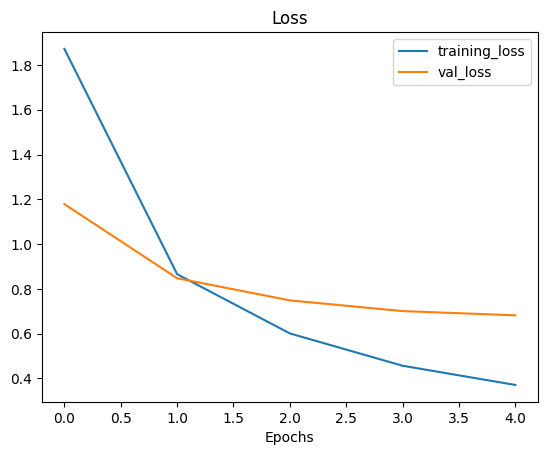

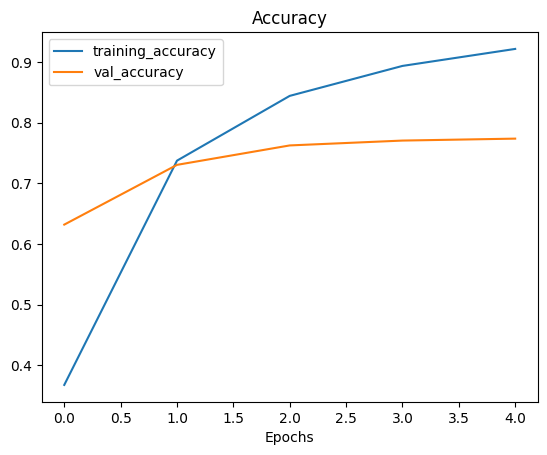

In [29]:
plot_loss_curves(resnet_history)

In [30]:
#re.summary
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Pre_trained_layer (KerasLay  (None, 2048)             23564800  
 er)                                                             
                                                                 
 Output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


We have 23M params already trained.
Only 20K params are trainable but we can change that by doing model trainable=True

Now doing the same thing with efficientnetB0

In [31]:
# Create the model
efficientnet_model = create_model(efficientnet_url, num_classes=train_data_10_percent.num_classes)

In [32]:
# compile the model
efficientnet_model.compile(loss=tf.keras.losses.categorical_crossentropy,
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=["accuracy"])

In [34]:
# fit the model
efficientnet_history = efficientnet_model.fit(train_data_10_percent,
                                              epochs=5,
                                              steps_per_epoch=len(train_data_10_percent),
                                              validation_data=test_data_10_percent,
                                              validation_steps=len(test_data_10_percent),
                                              callbacks=create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                                    experiment_name="EfficientnetB0"))

Saving TensorBoard log files to: tensorflow_hub/EfficientnetB0/20230820-094208
Epoch 1/5
24/24 [==============================] - 25s 552ms/step - loss: 1.8474 - accuracy: 0.4480 - val_loss: 1.2805 - val_accuracy: 0.7260
Epoch 2/5
24/24 [==============================] - 12s 507ms/step - loss: 1.0547 - accuracy: 0.7733 - val_loss: 0.8602 - val_accuracy: 0.8192
Epoch 3/5
24/24 [==============================] - 14s 596ms/step - loss: 0.7563 - accuracy: 0.8333 - val_loss: 0.6909 - val_accuracy: 0.8452
Epoch 4/5
24/24 [==============================] - 13s 569ms/step - loss: 0.6048 - accuracy: 0.8773 - val_loss: 0.6075 - val_accuracy: 0.8600
Epoch 5/5
24/24 [==============================] - 23s 988ms/step - loss: 0.5156 - accuracy: 0.8960 - val_loss: 0.5546 - val_accuracy: 0.8620


The EfficientNetB0 model does even better than the ResNetV250 model! Achieving over 85% accuracy on the test set...again with only 10% of the training data.

Checking Loss_curves

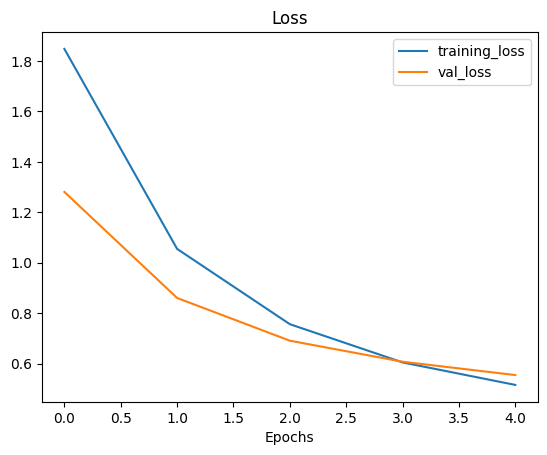

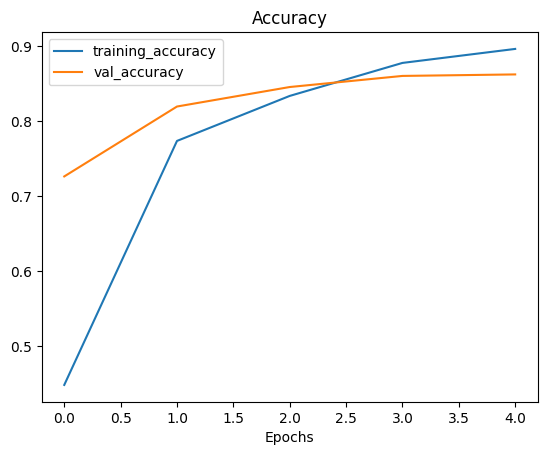

In [35]:
plot_loss_curves(efficientnet_history)

From the look of the EfficientNetB0 model's loss curves, it looks like if we kept training our model for longer, it might improve even further.

Maybe for 10 epoch...

In [36]:
# summary
efficientnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Pre_trained_layer (KerasLay  (None, 1280)             4049564   
 er)                                                             
                                                                 
 Output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


It seems despite having over four times less parameters (4,049,564 vs. 23,564,800) than the ResNet50V2 extraction layer, the EfficientNetB0 feature extraction layer yields better performance.

#Comparing models using TensorBoard



##Uploading experiments to TensorBoard

To upload a series of TensorFlow logs to TensorBoard, we can use the following command:

  *Upload TensorBoard dev records:*
```
  !tensorboard dev upload --logdir ./tensorflow_hub/ \
    --name "EfficientNetB0 vs. ResNet50V2" \
    --description "Comparing two different TF Hub feature extraction models architectures using 10% of training images" \
    --one_shot
```
Where:

* **--logdir** is the target upload directory
* **--name** is the name of the experiment
* **--description** is a brief description of the experiment
* **--one_shot** exits the TensorBoard uploader once uploading is finished


In [38]:
# Uploading  TensorBoard dev records
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "EfficientNetB0 vs. ResNet50V2" \
  --description "Comparing two different TF Hub feature extraction models architectures using 10% of training images" \
  --one_shot

2023-08-20 09:55:13.716591: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tensorflow_hub/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   MZDP-WGNF



New experiment created. View your TensorBoard at: https://tensorboard.dev/expe

In [39]:
!tensorboard dev list

2023-08-20 09:58:03.146271: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
https://tensorboard.dev/experiment/7oWgJWbrRj2PUeyL6nKbiw/
	Name                 EfficientNetB0 vs. ResNet50V2
	Description          Comparing two different TF Hub feature extraction models architectures using 10% of training images
	Id                   7oWgJWbrRj2PUeyL6nKbiw
	Created              2023-08-20 09:56:15 (1 minute ago)
	Updated              2023-08-20 09:56:18 (1 minute ago)
	Runs                 4
	Tags                 5
	Scalars              60
	Tensor bytes         0
	Binary object bytes  5793036
Total: 1 experiment(s)


##Deleting experiments from TensorBoard

In [40]:
# Delete an experiment
!tensorboard dev delete --experiment_id 7oWgJWbrRj2PUeyL6nKbiw

2023-08-20 09:59:06.268498: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Deleted experiment 7oWgJWbrRj2PUeyL6nKbiw.


In [41]:
!tensorboard dev list # checking to see if the exp still exists or not

2023-08-20 09:59:21.815233: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
No experiments. Use `tensorboard dev upload` to get started.


## Uploading experiments to TensorBoard Again

In [43]:
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "EfficientNetB0 vs. ResNet50V2" \
  --description "Comparing two different TF Hub feature extraction models architectures using 10% of training images" \
  --one_shot

2023-08-20 10:01:08.429141: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/LAWQa5Q3S6GEO4FagGqajA/

[2023-08-20T10:01:10] Started scanning logdir.
[2023-08-20T10:01:12] Total uploaded: 60 scalars, 0 tensors, 2 binary objects (5.5 MB)
[2023-08-20T10:01:12] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/LAWQa5Q3S6GEO4FagGqajA/


In [44]:
!tensorboard dev list

2023-08-20 10:02:14.777836: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
https://tensorboard.dev/experiment/LAWQa5Q3S6GEO4FagGqajA/
	Name                 EfficientNetB0 vs. ResNet50V2
	Description          Comparing two different TF Hub feature extraction models architectures using 10% of training images
	Id                   LAWQa5Q3S6GEO4FagGqajA
	Created              2023-08-20 10:01:10 (1 minute ago)
	Updated              2023-08-20 10:01:12 (1 minute ago)
	Runs                 4
	Tags                 5
	Scalars              60
	Tensor bytes         0
	Binary object bytes  5793036
Total: 1 experiment(s)
